<a href="https://colab.research.google.com/github/jimitogni/ml_study/blob/master/cat-dogs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet

#carregando a vgg
vgg_model = vgg16.VGG16(weights='imagenet')

#inceptionv3
inception_model = inception_v3.InceptionV3(weights='imagenet')

#resnet
resnet_model = resnet50.ResNet50(weights='imagenet')

#mobile
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

Using TensorFlow backend.






553467904/553467096 [==============================] - 12s 0us/step









96116736/96112376 [==============================] - 3s 0us/step

102858752/102853048 [==============================] - 3s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
17227776/17225924 [==============================] - 1s 0us/step


PIL image size (224, 224)


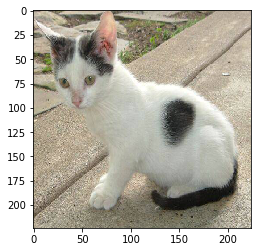

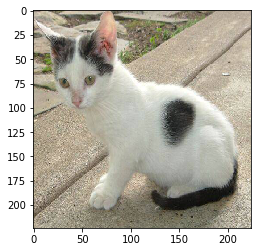

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


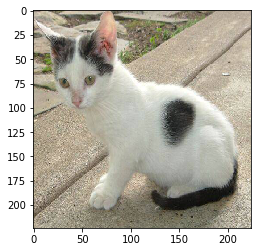

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

%matplotlib inline

filename = 'cat.jpg'

#load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size', original.size)
plt.imshow(original)
plt.show()

#convert the PIL image to a numpy array
#IN PIL - image is in (width, height, channel)
#In numpy - image is in (width, height, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size', numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the 
# data at a particular axis We want the input matrix 
# to the network to be of the form 
# (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [0]:
# prepare the image for the vgg model
processed_image = vgg16.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)

# print predictions

# convert the probabilities to class labels
# we will het top 5 preditions which is the default
label = decode_predictions(predictions)
print (label)

40960/35363 [==================================] - 0s 0us/step
[[('n02123597', 'Siamese_cat', 0.3093417), ('n01877812', 'wallaby', 0.080341265), ('n02326432', 'hare', 0.07509856), ('n02325366', 'wood_rabbit', 0.050530776), ('n03223299', 'doormat', 0.048173603)]]


In [0]:
# prepare the image for the vgg model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_mode 

# print predictions

# convert the probabilities to class labels
# we will het top 5 preditions which is the default
label = decode_predictions(predictions)
print (label)

In [55]:
https://medium.com/analytics-vidhya/transfer-learning-using-inception-v3-for-image-classification-86700411251b

SyntaxError: ignored

In [44]:
#downloading database cats and dogs
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip

--2019-12-06 21:11:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   197MB/s    in 0.3s    

2019-12-06 21:11:21 (197 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

%matplotlib inline 

In [0]:
# separating images for training, test and validation

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./images')
zip_ref.close()



In [0]:
base_dir = './images/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# dir with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# dir with our training dogs pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# dir with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# dir with our validation dogs pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [48]:
# modelo com 4 camadas convolucionais, com 32, 64, 128 e 128 convs

model = tf.keras.models.Sequential([
    # note the input shape is desired size of image 150x150 with 3 bytes color
    
    # this is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #implementing dropout
    tf.keras.layers.Dropout(0.5),

    # flatten the resultos to feed indo a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neurons on hidem layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # only 1 neuron on output, 0 - 1
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# tray to test with adam and adagrad optimizers
model.compile(optimizer = RMSprop(lr=1e-4),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [0]:
# reiscaling images to 1./255

# now with data augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [50]:
# flow TRAINING images in batches of 20 using 
train_generator = train_datagen.flow_from_directory(
        train_dir, #directiory source for train images
        target_size=(150, 150), #all images resized to 150x150
        batch_size=20,
        class_mode='binary' #since we use binary cross entropy loss, we need to binary labels)
)

# flow VALIDATION images in batches of 20 using 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, #directiory source for train images
        target_size=(150, 150), #all images resized to 150x150
        batch_size=20,
        class_mode='binary' #since we use binary cross entropy loss, we need to binary labels)
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [51]:
# We add noize with data augmentation, fliping, zooing and distorting the dataset
# the model going down on overfit without data augmentation 
# for resolve it we implement virtual resize dataset with D.A.
# that way we win the overfit

# TRAINIG for 100 epochs
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100, # 2000 imagens = batch_size * steps
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50, # 1000 images = batch * steps
        verbose=2
        )

Epoch 1/100
Epoch 1/100
100/100 - 22s - loss: 0.6954 - acc: 0.4965 - val_loss: 0.6820 - val_acc: 0.5510
Epoch 2/100
Epoch 1/100
100/100 - 19s - loss: 0.6887 - acc: 0.5385 - val_loss: 0.6671 - val_acc: 0.6080
Epoch 3/100
Epoch 1/100
100/100 - 20s - loss: 0.6726 - acc: 0.5820 - val_loss: 0.6425 - val_acc: 0.6100
Epoch 4/100
Epoch 1/100
100/100 - 19s - loss: 0.6619 - acc: 0.5925 - val_loss: 0.6239 - val_acc: 0.6370
Epoch 5/100
Epoch 1/100
100/100 - 19s - loss: 0.6504 - acc: 0.6145 - val_loss: 0.6313 - val_acc: 0.6100
Epoch 6/100
Epoch 1/100
100/100 - 19s - loss: 0.6355 - acc: 0.6230 - val_loss: 0.5954 - val_acc: 0.6780
Epoch 7/100
Epoch 1/100
100/100 - 19s - loss: 0.6286 - acc: 0.6490 - val_loss: 0.5863 - val_acc: 0.6690
Epoch 8/100
Epoch 1/100
100/100 - 20s - loss: 0.6159 - acc: 0.6555 - val_loss: 0.7086 - val_acc: 0.5820
Epoch 9/100
Epoch 1/100
100/100 - 20s - loss: 0.6045 - acc: 0.6810 - val_loss: 0.6063 - val_acc: 0.6490
Epoch 10/100
Epoch 1/100
100/100 - 20s - loss: 0.6023 - acc: 0.6

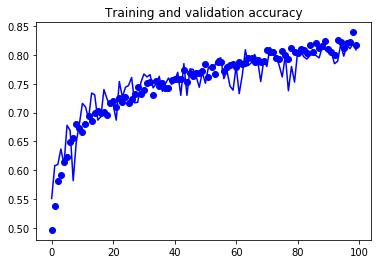

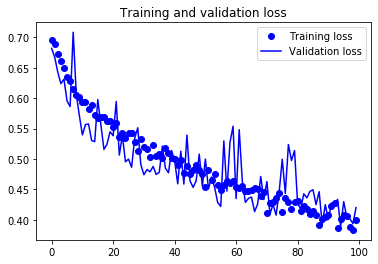

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

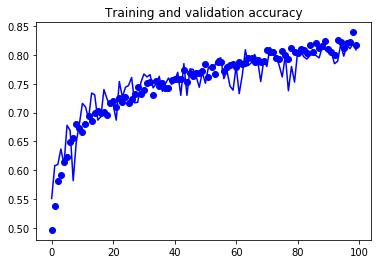

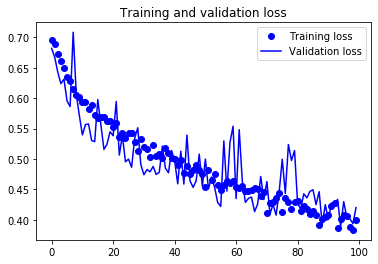

In [53]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
%matplotlib inline

%pylab inline

figsize(20,12)

for num, data in enumerate(train_generator[:50]):
    #gato: [1,0] - cachorro: [0,1]
    
    img_num = train_generator[1]
    img_data = train_generator[0]
    
    y = fig.add_subplot(5,10,num+1)
    orig = img_data
    data = img_data.reshape(50,50,1)
    
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label = 'Cat'
        
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

Populating the interactive namespace from numpy and matplotlib


TypeError: ignored

In [0]:
# upload and classifier images

import numpy as np
from google.colab import files
from keras.preprocessing import image

# predicting images
path = './images'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0.5:
  print(fn + 'is a DOG')
else:
  print(fn + 'is a CAT')